In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [3]:
training_set = dataset_train.iloc[:, 1:2].values
training_set.shape

(1258, 1)

In [5]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

In [6]:
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [7]:
training_set_scaled.shape

(1258, 1)

In [8]:
a=training_set_scaled[0:60,0]
np.array(a).shape

(60,)

In [9]:
training_set_scaled[60,0]

0.08627874097775134

In [10]:
X_train = []
y_train = []

In [11]:
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [12]:
X_train.shape

(1198, 60)

In [13]:
y_train.shape

(1198,)

In [14]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [15]:
X_train.shape

(1198, 60, 1)

In [16]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [17]:
regressor = Sequential()
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(Dense(units = 1))
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error',metrics=['accuracy'])

In [19]:
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
38/38 [==============================] - 60s 257ms/step - loss: 0.0466 - accuracy: 0.0017
Epoch 2/100
38/38 [==============================] - 10s 264ms/step - loss: 0.0066 - accuracy: 0.0017
Epoch 3/100
38/38 [==============================] - 9s 234ms/step - loss: 0.0057 - accuracy: 0.0017
Epoch 4/100
38/38 [==============================] - 10s 261ms/step - loss: 0.0056 - accuracy: 0.0017
Epoch 5/100
38/38 [==============================] - 12s 313ms/step - loss: 0.0057 - accuracy: 0.0017
Epoch 6/100
38/38 [==============================] - 11s 302ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 7/100
38/38 [==============================] - 11s 280ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 8/100
38/38 [==============================] - 9s 240ms/step - loss: 0.0044 - accuracy: 0.0017
Epoch 9/100
38/38 [==============================] - 9s 243ms/step - loss: 0.0049 - accuracy: 0.0017
Epoch 10/100
38/38 [==============================] - 9s 234ms/step - loss: 0.0041 - 

38/38 [==============================] - 9s 235ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 82/100
38/38 [==============================] - 9s 245ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 83/100
38/38 [==============================] - 9s 241ms/step - loss: 0.0015 - accuracy: 0.0017
Epoch 84/100
38/38 [==============================] - 10s 261ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 85/100
38/38 [==============================] - 9s 241ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 86/100
38/38 [==============================] - 9s 239ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 87/100
38/38 [==============================] - ETA: 0s - loss: 0.0016 - accuracy: 0.00 - 9s 235ms/step - loss: 0.0016 - accuracy: 0.0017
Epoch 88/100
38/38 [==============================] - 9s 245ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 89/100
38/38 [==============================] - 9s 236ms/step - loss: 0.0017 - accuracy: 0.0017
Epoch 90/100
38/38 [==============================] 

In [20]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

real_stock_price.shape

(20, 1)

In [21]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)

In [22]:
inputs.shape

(80, 1)

In [23]:
X_test=[]

In [24]:

for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

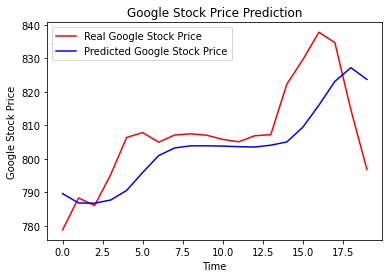

In [25]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()